Try to compare the price and see the effect of quaterly result on price

In [181]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

In [109]:
# Example Infy
start_date = '2021-06-01'
end_date = '2024-07-19'
yf_data = yf.download('INFY.NS', start=start_date, end = end_date)
yf_data = yf_data.resample('D').ffill()

[*********************100%%**********************]  1 of 1 completed


In [110]:
yf_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,1400.000000,1401.000000,1378.650024,1387.199951,1303.727905,4791325
2021-06-02,1380.750000,1391.949951,1365.000000,1378.650024,1295.692627,9272276
2021-06-03,1388.099976,1399.000000,1377.050049,1389.650024,1306.030762,5115645
2021-06-04,1393.949951,1396.900024,1377.650024,1385.650024,1302.271362,4194328
2021-06-05,1393.949951,1396.900024,1377.650024,1385.650024,1302.271362,4194328
...,...,...,...,...,...,...
2024-07-14,1680.000000,1719.750000,1666.650024,1711.750000,1711.750000,17078316
2024-07-15,1726.199951,1728.000000,1702.650024,1707.050049,1707.050049,6942230
2024-07-16,1718.599976,1737.900024,1700.000000,1726.050049,1726.050049,6886281


In [166]:
q_data = pd.read_csv("../../data/infy_quarterly.csv")
q_data= q_data.rename(columns={'Close':'Date'})
q_data

,Date,Sales +,Expenses +,Operating Profit,OPM %,Other Income +,Interest,Depreciation,Profit before tax,Tax %,Net Profit +
0,2021-06-01,27896.0,20464.0,7432.0,0.27,622.0,49.0,829.0,7176.0,0.28,5201.0
1,2021-09-01,29602.0,21771.0,7831.0,0.26,524.0,48.0,859.0,7448.0,0.27,5428.0
2,2021-12-01,31867.0,23484.0,8383.0,0.26,512.0,53.0,899.0,7943.0,0.27,5822.0
3,2022-03-01,32276.0,24430.0,7846.0,0.24,637.0,50.0,890.0,7543.0,0.24,5695.0
4,2022-06-01,34470.0,26606.0,7864.0,0.23,676.0,56.0,950.0,7534.0,0.29,5362.0
5,2022-09-01,36538.0,27636.0,8902.0,0.24,584.0,66.0,1029.0,8391.0,0.28,6026.0
6,2022-12-01,38318.0,28951.0,9367.0,0.24,769.0,80.0,1125.0,8931.0,0.26,6586.0
7,2023-03-01,37441.0,28443.0,8998.0,0.24,671.0,82.0,1121.0,8466.0,0.28,6134.0
8,2023-06-01,37933.0,28869.0,9064.0,0.24,561.0,90.0,1173.0,8362.0,0.29,5945.0
9,2023-09-01,38994.0,29554.0,9440.0,0.24,632.0,138.0,1166.0,8768.0,0.29,6215.0


In [167]:
# q_data = q_data.dropna(axis=1)
yf_data = pd.DataFrame(yf_data['Close'])
yf_data

,Close
Date,
2021-06-01,1387.199951
2021-06-02,1378.650024
2021-06-03,1389.650024
2021-06-04,1385.650024
2021-06-05,1385.650024
...,...
2024-07-14,1711.750000
2024-07-15,1707.050049
2024-07-16,1726.050049


In [168]:
# Combine price data to q_data
# yf_data = yf_data.ffill()
# q_data['Close'] = 
price = yf_data.loc[q_data['Date']]['Close']
price.values
q_data['Close'] = price.values
# yf_data.loc[q_data['Date']]['Close']
# yf_data.loc['2024-09-21']|
# yf_data.head(10)

In [172]:
q_data = q_data.set_index(q_data['Date'])
q_data = q_data.drop(columns=["Date"])

In [234]:
# correlation 
corr = q_data.corr()

In [235]:
corr.style.background_gradient(cmap='coolwarm')

,Sales +,Expenses +,Operating Profit,OPM %,Other Income +,Interest,Depreciation,Profit before tax,Tax %,Net Profit +,Close,Close%,Profit%
Sales +,1.000000,0.996787,0.928914,-0.780469,0.284872,0.817447,0.964817,0.792540,0.140744,0.641439,-0.318367,-0.289457,-0.069789
Expenses +,0.996787,1.000000,0.896270,-0.822596,0.311297,0.807616,0.957058,0.785332,0.123735,0.640700,-0.321655,-0.321910,-0.070444
Operating Profit,0.928914,0.896270,1.000000,-0.518634,0.138221,0.792647,0.917772,0.757753,0.207287,0.589730,-0.275806,-0.112625,-0.058511
OPM %,-0.780469,-0.822596,-0.518634,1.000000,-0.420787,-0.495585,-0.676515,-0.602600,0.143292,-0.554870,0.087964,0.365880,-0.047955
Other Income +,0.284872,0.311297,0.138221,-0.420787,1.000000,0.355253,0.357127,0.747704,-0.701084,0.859321,0.233770,0.298523,0.638027
Interest,0.817447,0.807616,0.792647,-0.495585,0.355253,1.000000,0.877795,0.734793,0.159575,0.592193,-0.370302,0.014621,0.029678
Depreciation,0.964817,0.957058,0.917772,-0.676515,0.357127,0.877795,1.000000,0.825964,0.122667,0.682445,-0.380813,-0.178428,0.006491
Profit before tax,0.792540,0.785332,0.757753,-0.602600,0.747704,0.734793,0.825964,1.000000,-0.344941,0.966126,0.008813,0.169335,0.444059
Tax %,0.140744,0.123735,0.207287,0.143292,-0.701084,0.159575,0.122667,-0.344941,1.000000,-0.570123,-0.741351,-0.533141,-0.676913
Net Profit +,0.641439,0.640700,0.589730,-0.554870,0.859321,0.592193,0.682445,0.966126,-0.570123,1.000000,0.197657,0.295868,0.593292


In [233]:
q_data

,Sales +,Expenses +,Operating Profit,OPM %,Other Income +,Interest,Depreciation,Profit before tax,Tax %,Net Profit +,Close,Close%,Profit%
Date,,,,,,,,,,,,,
2021-06-01,27896.0,20464.0,7432.0,0.27,622.0,49.0,829.0,7176.0,0.28,5201.0,1387.199951,NaN,NaN
2021-09-01,29602.0,21771.0,7831.0,0.26,524.0,48.0,859.0,7448.0,0.27,5428.0,1677.750000,20.945073,4.364545
2021-12-01,31867.0,23484.0,8383.0,0.26,512.0,53.0,899.0,7943.0,0.27,5822.0,1714.900024,2.214277,7.258659
2022-03-01,32276.0,24430.0,7846.0,0.24,637.0,50.0,890.0,7543.0,0.24,5695.0,1715.599976,0.040816,-2.181381
2022-06-01,34470.0,26606.0,7864.0,0.23,676.0,56.0,950.0,7534.0,0.29,5362.0,1478.550049,-13.817319,-5.847234
2022-09-01,36538.0,27636.0,8902.0,0.24,584.0,66.0,1029.0,8391.0,0.28,6026.0,1464.199951,-0.970552,12.383439
2022-12-01,38318.0,28951.0,9367.0,0.24,769.0,80.0,1125.0,8931.0,0.26,6586.0,1657.099976,13.174432,9.293063
2023-03-01,37441.0,28443.0,8998.0,0.24,671.0,82.0,1121.0,8466.0,0.28,6134.0,1496.050049,-9.718782,-6.863043
2023-06-01,37933.0,28869.0,9064.0,0.24,561.0,90.0,1173.0,8362.0,0.29,5945.0,1319.500000,-11.801079,-3.081187


In [232]:
q_data['Close%'] = q_data["Close"].pct_change()*100
q_data['Profit%']= q_data['Net Profit\xa0+'].pct_change()*100

In [209]:
q_data['Net Profit\xa0+'].pct_change()*100

Date
2021-06-01          NaN
2021-09-01     4.364545
2021-12-01     7.258659
2022-03-01    -2.181381
2022-06-01    -5.847234
2022-09-01    12.383439
2022-12-01     9.293063
2023-03-01    -6.863043
2023-06-01    -3.081187
2023-09-01     4.541632
2023-12-01    -1.641191
2024-03-01    30.459676
2024-06-01   -20.075235
Name: Net Profit +, dtype: float64

In [218]:
analysis = {}
analysis['profit%'] = q_data['Net Profit\xa0+'].pct_change()*100
analysis['close%'] = q_data["Close"].pct_change()*100

In [219]:
analysis

{'profit%': Date
 2021-06-01          NaN
 2021-09-01     4.364545
 2021-12-01     7.258659
 2022-03-01    -2.181381
 2022-06-01    -5.847234
 2022-09-01    12.383439
 2022-12-01     9.293063
 2023-03-01    -6.863043
 2023-06-01    -3.081187
 2023-09-01     4.541632
 2023-12-01    -1.641191
 2024-03-01    30.459676
 2024-06-01   -20.075235
 Name: Net Profit +, dtype: float64,
 'close%': Date
 2021-06-01          NaN
 2021-09-01    20.945073
 2021-12-01     2.214277
 2022-03-01     0.040816
 2022-06-01   -13.817319
 2022-09-01    -0.970552
 2022-12-01    13.174432
 2023-03-01    -9.718782
 2023-06-01   -11.801079
 2023-09-01     9.424022
 2023-12-01     0.585246
 2024-03-01    13.936507
 2024-06-01   -14.975520
 Name: Close, dtype: float64}

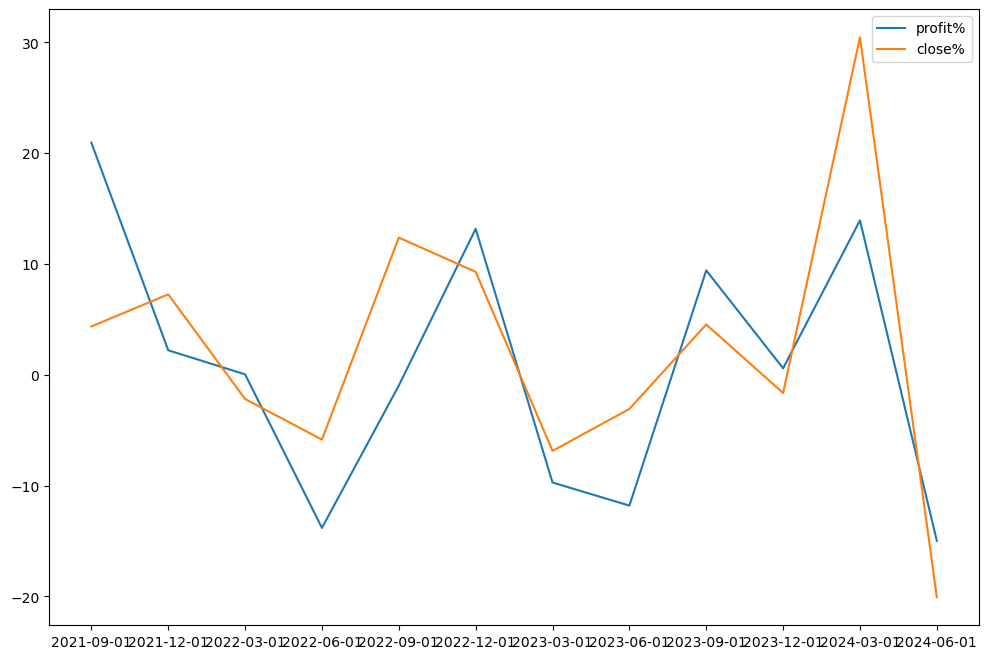

In [230]:
# pd.DataFrame(analysis).plot()
plt.figure(figsize=(12, 8))
plt.plot(analysis_df[['close%','profit%']])
plt.legend(analysis_df);

In [223]:
analysis_df = pd.DataFrame(analysis)
analysis_df['diff'] = analysis_df['profit%'] - analysis_df['close%']
analysis_df

,profit%,close%,diff
Date,,,
2021-06-01,NaN,NaN,NaN
2021-09-01,4.364545,20.945073,-16.580528
2021-12-01,7.258659,2.214277,5.044382
2022-03-01,-2.181381,0.040816,-2.222197
2022-06-01,-5.847234,-13.817319,7.970085
2022-09-01,12.383439,-0.970552,13.353991
2022-12-01,9.293063,13.174432,-3.881368
2023-03-01,-6.863043,-9.718782,2.855739
2023-06-01,-3.081187,-11.801079,8.719892
